<a href="https://colab.research.google.com/github/patlewig/cas_checksum/blob/master/notebooks/Genotoxicity_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Genotoxicity Analysis - Pradeep et al 


Notebook to reconcile genotoxicity data into a new dictionary to facilitate the analysis of the variability of selected genotoxicity assays


In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [303]:
data = '/content/drive/My Drive/genetox/'

In [304]:
xls = pd.ExcelFile(data+'genetox_160120.xlsx')

In [305]:
xls.sheet_names

['all_genetox_exptdata']

In [306]:
genetox = xls.parse(xls.sheet_names[0])

In [307]:
genetox.shape

(46557, 20)

In [308]:
genetox.head()

,Unnamed: 0,dsstox_substance_id,name,casrn,newname2,CASRN,PREFERRED_NAME,assay_result,assay_type,assay_type_standard,reference,source,species,strain,year,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
0,0,DTXSID5039224,ACETALDEHYDE (Preferred Term); ACETALDEHYDE (I...,75-07-0,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
1,5,DTXSID5020106,ASCORBIC ACID (Preferred Term); ASCORBIC ACID ...,50-81-7,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),MUTAT RES 242:169-180,COSMOS,DROSOPHILA MELANOGASTER,NaN,1990.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
2,6,DTXSID8039241,BENZALDEHYDE (INCI); BENZALDEHYDE (Preferred T...,100-52-7,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
3,7,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:229-234,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other
4,8,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:243-255,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other


In [309]:
genetox.aggregate_study_type.unique()

array(['other', 'DNA damage/repair', 'ivtCA', 'ivtMN', 'ivCA', 'ivMNT',
       'ivt_gene_mutation', 'Ames', 'MLA', nan, 'DLT'], dtype=object)

In [310]:
genetox.simple_aggregate.unique()
    


array(['other', 'clastogen', 'gene_mutation', 'Ames', nan], dtype=object)

In [311]:
mapping_dict = dict(set(list(zip(genetox.aggregate_study_type, genetox.simple_aggregate))))

In [312]:
mapping_dict

{'Ames': 'Ames',
 'DLT': 'clastogen',
 'DNA damage/repair': 'other',
 'MLA': 'clastogen',
 'ivCA': 'clastogen',
 'ivMNT': 'clastogen',
 'ivtCA': 'clastogen',
 'ivtMN': 'clastogen',
 'ivt_gene_mutation': 'gene_mutation',
 nan: nan,
 'other': 'other'}

In [313]:
genetox.dsstox_substance_id.value_counts(dropna =False)


-                 6183
DTXSID2051217     1167
NaN                506
DTXSID2020715      169
DTXSID2020216      158
                  ... 
DTXSID2025765        1
DTXSID90210777       1
DTXSID30177294       1
DTXSID1041681        1
DTXSID0021331        1
Name: dsstox_substance_id, Length: 6024, dtype: int64

In [314]:
genetox.columns

Index(['Unnamed: 0', 'dsstox_substance_id', 'name', 'casrn', 'newname2',
       'CASRN', 'PREFERRED_NAME', 'assay_result', 'assay_type',
       'assay_type_standard', 'reference', 'source', 'species', 'strain',
       'year', 'standard_assay_type', 'assay_result_std', 'assay_outcome',
       'aggregate_study_type', 'simple_aggregate'],
      dtype='object')

In [315]:
genetox['dsstox_substance_id'] = genetox['dsstox_substance_id'].replace('-','missing')
genetox['dsstox_substance_id'] = genetox['dsstox_substance_id'].replace('', 'missing')

In [316]:
genetox.dsstox_substance_id.describe()

count       46051
unique       6023
top       missing
freq         6183
Name: dsstox_substance_id, dtype: object

In [317]:
new_id = []
for x,y,z in list(zip(genetox['dsstox_substance_id'], genetox['casrn'], genetox['newname2'])):
  if str(x).startswith('DTXSID') :
    new_id.append(x)
  elif x == 'missing' and y == ' ':
    new_id.append('dtx' + z)
  else:
    new_id.append(y)
    

In [318]:
len(new_id)

46557

In [319]:
genetox['new_index'] = new_id

In [320]:
df = genetox.copy()

In [321]:
df = genetox.set_index('new_index')

In [322]:
df['Ames'] = df['aggregate_study_type'] == 'Ames'

In [323]:
df['ivMNT'] = df['aggregate_study_type'] == 'ivMNT'

In [324]:
df.Ames.value_counts()

False    24000
True     22557
Name: Ames, dtype: int64

In [325]:
df['ivMNT'].value_counts()

False    46320
True       237
Name: ivMNT, dtype: int64

In [326]:
df.head()

,Unnamed: 0,dsstox_substance_id,name,casrn,newname2,CASRN,PREFERRED_NAME,assay_result,assay_type,assay_type_standard,reference,source,species,strain,year,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate,Ames,ivMNT
new_index,,,,,,,,,,,,,,,,,,,,,,
DTXSID5039224,0,DTXSID5039224,ACETALDEHYDE (Preferred Term); ACETALDEHYDE (I...,75-07-0,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other,False,False
DTXSID5020106,5,DTXSID5020106,ASCORBIC ACID (Preferred Term); ASCORBIC ACID ...,50-81-7,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),MUTAT RES 242:169-180,COSMOS,DROSOPHILA MELANOGASTER,NaN,1990.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other,False,False
DTXSID8039241,6,DTXSID8039241,BENZALDEHYDE (INCI); BENZALDEHYDE (Preferred T...,100-52-7,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),ENVIRON MUTAGEN 7:677-702,COSMOS,DROSOPHILA MELANOGASTER,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other,False,False
DTXSID1020144,7,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:229-234,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other,False,False
DTXSID1020144,8,DTXSID1020144,BENZOIN (INCI); BENZOIN (Preferred Term),119-53-9,NaN,NaN,NaN,positive,In Vivo Non-mammalian Mutagenesis,mutagenesis (in vivo),PROG MUTAT RES 5:243-255,COSMOS,SACCHAROMYCES CEREVISIAE,NaN,1985.0,In Vivo Non-mammalian Mutagenesis,positive,1,other,other,False,False


In [327]:
df.groupby(['new_index', 'aggregate_study_type']).agg({'assay_outcome': ['mean', 'count', 'min', 'max']})
  

assay_outcome              
                                            mean count min max
new_index     aggregate_study_type                            
1000172-11-1  Ames                           0.0     8   0   0
              ivtCA                          0.0     2   0   0
              ivt_gene_mutation              0.0     2   0   0
1000777-61-6  Ames                           0.0     3   0   0
1000817-22-0  Ames                           0.0     4   0   0
...                                          ...   ...  ..  ..
DTXSID9097381 Ames                           0.0     2   0   0
DTXSID9098147 Ames                           0.0     3   0   0
DTXSID9098220 Ames                           0.0     3   0   0
              ivtMN                          0.0     1   0   0
              ivt_gene_mutation              0.0     2   0   0

[13731 rows x 4 columns]

In [328]:
set(list(zip(df.assay_outcome, df.assay_result_std)))


{(0, 'negative'), (1, 'positive'), (2, 'inconclusive'), (2, 'not determined')}

In [329]:
a_calls = {}
for i, group in genetox.groupby(['new_index']):
  subset = group[['aggregate_study_type', 'assay_outcome']]
  news = [x for x in subset.values if x.any() == 'Ames']
  k = [n for n in group['new_index'] if n != ' '][0]
  value = list(subset['assay_outcome'])
  a_calls[k] = value

In [330]:
first_fifty = dict(list(a_calls.items())[0:50])

Text(0, 0.5, 'assay_outcome')

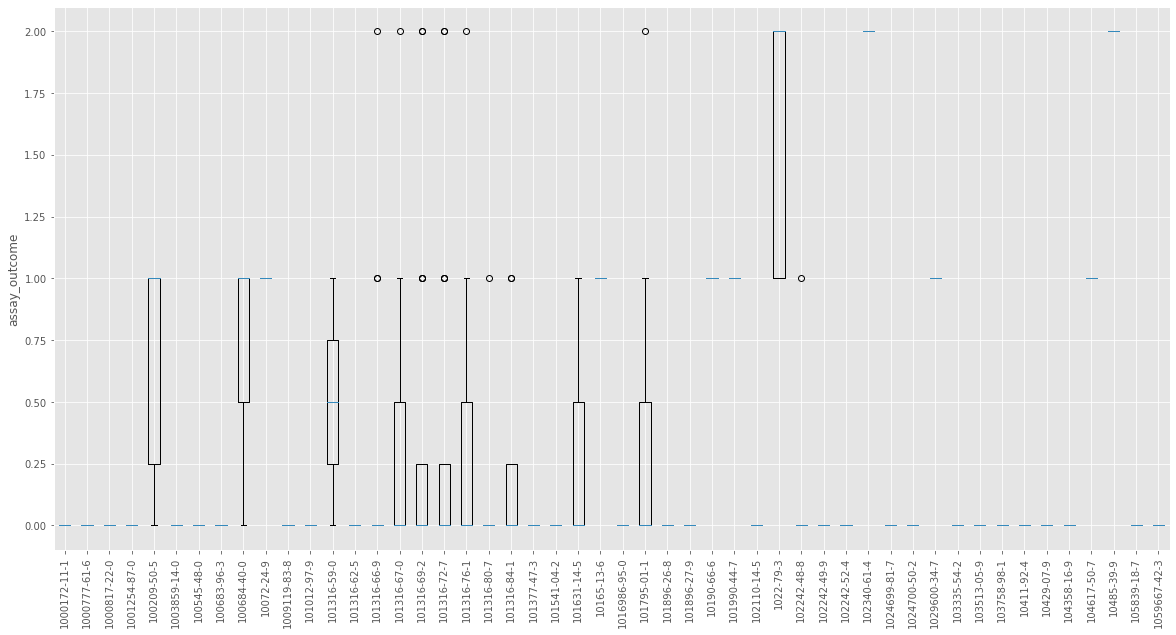

In [331]:
plt.style.use('ggplot')
plt.figure(figsize = (20,10))
labels, data = [*zip(*first_fifty.items())]
plt.boxplot(data)
plt.xticks(range(1, len(labels)+1), labels, rotation = 'vertical')
plt.ylabel('assay_outcome')

In [225]:
ames_df = pd.DataFrame(list(a_calls.items()), columns = ['ID', 'Ames_outcome'])

In [332]:
flat_ames_df = ames_df['Ames_outcome'].apply(lambda x: pd.Series(x)).stack().reset_index(level=1, drop=True).to_frame('Ames_outcome').join(ames_df[['ID']], how='left')

In [333]:
ames_df

,ID,Ames_outcome
0,1000172-11-1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1000777-61-6,"[0, 0, 0]"
2,1000817-22-0,"[0, 0, 0, 0, 0, 0]"
3,1001254-87-0,"[0, 0, 0, 0, 0, 0, 0, 0]"
4,100209-50-5,"[0, 0, 1, 1, 1, 1]"
...,...,...
7434,DTXSID9095008,"[1, 0, 0]"
7435,DTXSID90968605,"[0, 0, 0, 0]"
7436,DTXSID9097381,"[0, 0]"
7437,DTXSID9098147,"[0, 0, 0]"


In [334]:
flat_ames_df

,Ames_outcome,ID
0,0.0,1000172-11-1
0,0.0,1000172-11-1
0,0.0,1000172-11-1
0,0.0,1000172-11-1
0,0.0,1000172-11-1
...,...,...
7438,0.0,DTXSID9098220
7438,0.0,DTXSID9098220
7438,0.0,DTXSID9098220
7438,0.0,DTXSID9098220


In [335]:
g = flat_ames_df.groupby('ID').filter(lambda x: len(x['Ames_outcome']) >= 3)

In [338]:

bs_samples = g.groupby('ID').apply(lambda x : np.random.choice(x['Ames_outcome'], size=len(x['Ames_outcome'])))



In [337]:
from scipy.stats import mode

In [339]:
replicates = []
for e in bs_samples.values:
  x_mode,counts = mode(e)
  replicates.append(x_mode)


In [340]:
len(replicates)

4038

In [341]:
g_dict = {}
for i, group in g.groupby(['ID']):
  k = [n for n in group['ID'] if n != ' '][0]
  value = list(group['Ames_outcome'])
  g_dict[k] = value

In [343]:
#g_dict

In [345]:
mydata = g_dict['1000172-11-1']

In [346]:
mydata = np.array([1,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,1])

In [349]:
bootstrap_replicate_1d(mydata, np.mean)

0.5882352941176471

In [350]:
rest = bootstrap_replicate(g_dict, np.mean)

In [351]:
res = []
for k in list(g_dict.keys()):
  a = g_dict[k]
  x = bootstrap_replicate_1d(a, np.mean)
  res.append([x])

 

In [354]:
g_dict['1000172-11-1']

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [359]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points
    n = len(data)

    # x-data for the ECDF
    x = np.sort(data)

    # y-data for the ECDF
    y = np.arange(1, n + 1) / n

    return x, y
  

In [360]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))

    return func(bs_sample)


def draw_bs_reps(data, func, size=1):
    """Draw `size` bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [361]:
def plugin_summary(
    data, func, ptiles=(2.5, 97.5), n_bs_reps=10000, label=None
):
    """Compute and store ECDF, plug-in estimate, and confidence
    intervals in a dictionary."""
    # Initialize output dictionary
    summary = {}
    # Store data and settings
    summary['data'] = data
    summary['func'] = func
    summary['ptiles'] = ptiles
    summary['n_bs_reps'] = n_bs_reps
    summary['label'] = label
    # Compute ECDF x and y values
    summary['ecdf_x'], summary['ecdf_y'] = ecdf(data)
    # Compute plug-in estimate
    summary['estimate'] = func(data)
    # Compute bootstrap confidence interval
    summary['bs_reps'] = draw_bs_reps(data, func, size = n_bs_reps)
    summary['conf_int'] = np.percentile(summary['bs_reps'],ptiles)
    return summary


In [364]:
# Initialize list of plug-in summaries
summaries = []
# Iterate through groups and instantiate conf intervals
for i, group in g.groupby('ID'):
  summaries.append(
      plugin_summary(group['Ames_outcome'].dropna().values, np.mean, label = i)
  )

In [406]:
summaries[3]

{'bs_reps': array([0., 0., 0., ..., 0., 0., 0.]),
 'conf_int': array([0., 0.]),
 'data': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'ecdf_x': array([0., 0., 0., 0., 0., 0., 0., 0.]),
 'ecdf_y': array([0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 'estimate': 0.0,
 'func': <function numpy.mean>,
 'label': '1001254-87-0',
 'n_bs_reps': 10000,
 'ptiles': (2.5, 97.5)}

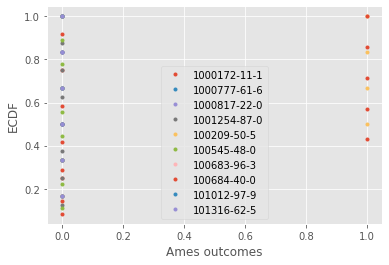

In [378]:
# Plot the ECDFs
for s in summaries[:10]:
  plt.plot(
      s['ecdf_x'],
      s['ecdf_y'],
      marker = '.',
      linestyle = 'none',
      label = s['label']
      
  )
  plt.xlabel('Ames outcomes')
  plt.ylabel('ECDF')
  plt.legend()

In [380]:
def plot_conf_ints(summaries, palette=None):
    """Plot confidence intervals with estimates."""
    # Set a nice color palette
    if palette is None:
        palette = [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf",
        ]
    elif type(palette) == str:
        palette = [palette]

    labels = [ci["label"] for ci in summaries][::-1]
    estimates = [ci["estimate"] for ci in summaries][::-1]
    conf_intervals = [ci["conf_int"] for ci in summaries][::-1]
    palette = palette[: len(labels)][::-1]

    # Set up axes for plot
    fig, ax = plt.subplots(figsize=(5, len(labels) / 2))

    # Plot estimates as dots and confidence intervals as lines
    for i, (label, est, conf_int) in enumerate(
        zip(labels, estimates, conf_intervals)
    ):
        color = palette[i % len(palette)]
        ax.plot(
            [est],
            [label],
            marker=".",
            linestyle="none",
            markersize=10,
            color=color,
        )

        ax.plot(conf_int, [label] * 2, linewidth=3, color=color)

    # Make sure margins look ok
    ax.margins(y=0.25 if len(labels) < 3 else 0.125)

    return ax

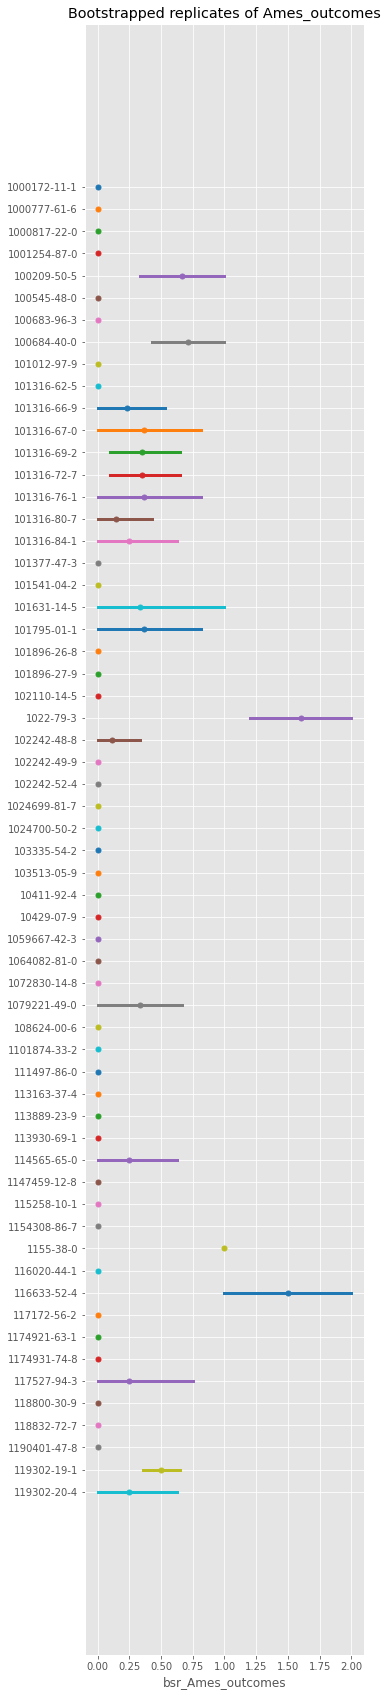

In [409]:
# Make plot
ax = plot_conf_ints(summaries[:60])
# Set the axis label
_ = ax.set_xlabel('bsr_Ames_outcomes')
_ = ax.set_title('Bootstrapped replicates of Ames_outcomes')

In [392]:
ames_std =  g.groupby(['ID'],as_index = True).agg({'Ames_outcome': ['mean','std']})

In [393]:

ames_std = ames_std['Ames_outcome', 'std'].reset_index()

In [396]:

ames_std.columns = ames_std.columns.droplevel(0)

In [398]:
ames_std.columns = ['ID','std']

In [399]:
np.random.seed(42)
std_devs, sims = [], 10000
for i in range(sims):
    temp_sample = np.random.choice(ames_std['std'], replace = True, size = len(ames_std['std']))
    sample_std = np.std(temp_sample)
    std_devs.append(sample_std)
    
boot_mean = np.mean(std_devs)
boot_95_CI = np.percentile(std_devs, [2.5, 97.5])

print('Bootstrapped mean std = {}, 95% CI = {}'.format(boot_mean, boot_95_CI))

Bootstrapped mean std = 0.3302184062739817, 95% CI = [0.32412307 0.33637204]


Text(0.5, 1.0, 'Bootstrapped std of all substances with 3 or more Ames outcomes')

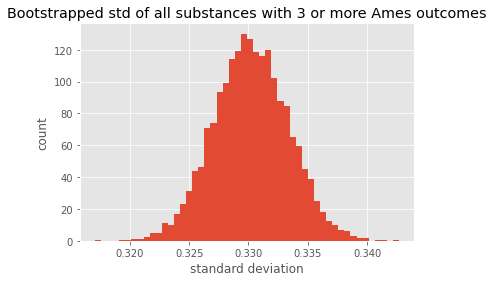

In [404]:
plt.hist(std_devs, bins = 50, density = True);
plt.xlabel('standard deviation')
plt.ylabel('count')
plt.title('Bootstrapped std of all substances with 3 or more Ames outcomes')

10000